# Proyek Analisis Data E-Commerce Public Dataset
- **Nama:** M. Raihan Al Farizy
- **Email:** mraihanaf0@gmail.com
- **ID Dicoding:** zaterra

## Menentukan Pertanyaan Bisnis

- Produk apa saja yang memiliki penjualan tertinggi dan terendah berdasarkan jumlah transaksi?
- Apa metode pembayaran yang paling sering digunakan oleh pelanggan?
- Bagaimana distribusi pelanggan berdasarkan provinsi, dan apakah ada wilayah dengan aktivitas pembelian lebih tinggi?
- Pada hari apa pelanggan paling sering berbelanja online?

## Import Semua Packages/Library yang Digunakan

In [ ]:

import kagglehub
import pandas as pd
import os
from kagglehub import KaggleDatasetAdapter
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Atur account kaggle
for key,value in json.load(open("kaggle.json")).items():
  os.environ[key] = value

In [117]:
REQUIRED_FILES = [
    "olist_order_items_dataset.csv",
    "olist_order_payments_dataset.csv",
    "olist_customers_dataset.csv",
    "olist_orders_dataset.csv",
    "olist_products_dataset.csv",
    "product_category_name_translation.csv"
]

DATA_DIR = "./olist_data"
os.makedirs(DATA_DIR, exist_ok=True)

dataframes = {}
for file in REQUIRED_FILES:
    file_path = os.path.join(DATA_DIR, file)
    if not os.path.exists(file_path):
      dataframes[file] = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "olistbr/brazilian-ecommerce",
        file,
      )
    else:
      dataframes[file] = pd.read_csv(file_path)
    print(f"Loaded: {file}")

order_items = dataframes[REQUIRED_FILES[0]]
order_payments = dataframes[REQUIRED_FILES[1]]
customers = dataframes[REQUIRED_FILES[2]]
orders = dataframes[REQUIRED_FILES[3]]
products = dataframes[REQUIRED_FILES[4]]
category_name_translation = dataframes[REQUIRED_FILES[5]]

Loaded: olist_order_items_dataset.csv
Loaded: olist_order_payments_dataset.csv
Loaded: olist_customers_dataset.csv
Loaded: olist_orders_dataset.csv
Loaded: olist_products_dataset.csv
Loaded: product_category_name_translation.csv


In [118]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [119]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [120]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [121]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [122]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [123]:
category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Dengan pertanyaan sebelumnya maka dataset yang cocok untuk menjawab pertanyaan bisnis tersebut adalah:

- product_sales
- payment_analysis
- customer_distribution

### Assessing Data

Lihat jumlah duplikat dan nilai kosong masing masing data

In [124]:
datasets = [order_items, order_payments, customers, orders, products, category_name_translation]
titles = ["order_items", "order_payments", "customers", "orders", "products", "category_name_translation"]

info_df = pd.DataFrame({},)
info_df['dataset']= titles
info_df['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]
info_df['cols_no']= [df.shape[1] for df in datasets]
info_df['null_no']= [df.isnull().sum().sum() for df in datasets]
info_df['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
info_df['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df.style.background_gradient(cmap='coolwarm')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,order_items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
1,order_payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
2,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
3,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,category_name_translation,"product_category_name, product_category_name_english",2,0,0,


### Cleaning Data

In [125]:
def clean_datasets():
    orders.fillna({
        'order_delivered_carrier_date': orders['order_estimated_delivery_date'],
        'order_delivered_customer_date': orders['order_estimated_delivery_date'],
        'order_approved_at': orders['order_purchase_timestamp']
    }, inplace=True)

    for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
        if col in products.columns:
            products[col] = products[col].fillna(products[col].median())

    for col in ['product_category_name']:
        if col in products.columns:
            products[col] = products[col].fillna('Tidak diketahui')

    products.dropna(axis=1, thresh=int(0.5 * len(products)), inplace=True)

    customers.fillna('Tidak diketahui', inplace=True)

    for df in [orders, products, customers, order_payments, order_items]:
        df.drop_duplicates(inplace=True)

    print("After cleaning:")
    print(products.isnull().sum())

clean_datasets()


After cleaning:
product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64


In [126]:
info_df.style.background_gradient(cmap='coolwarm')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,order_items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
1,order_payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
2,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
3,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
4,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
5,category_name_translation,"product_category_name, product_category_name_english",2,0,0,


In [127]:
# Merge untuk analisis produk
product_sales = order_items.merge(
    products,
    on='product_id'
).merge(
    category_name_translation,
    left_on='product_category_name',
    right_on='product_category_name'
)

# Merge untuk Analisis Payment
payment_analysis = orders.merge(
    order_payments,
    on='order_id'
)

# Merge untuk analisis customer
customer_distribution = customers.merge(
    orders,
    on='customer_id'
)

# Tambahkan day of week untuk analisis waktu
orders['order_day'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.day_name()

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [128]:
product_sales.info()
product_sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_id                     111023 non-null  object 
 3   seller_id                      111023 non-null  object 
 4   shipping_limit_date            111023 non-null  object 
 5   price                          111023 non-null  float64
 6   freight_value                  111023 non-null  float64
 7   product_category_name          111023 non-null  object 
 8   product_name_lenght            111023 non-null  float64
 9   product_description_lenght     111023 non-null  float64
 10  product_photos_qty             111023 non-null  float64
 11  product_weight_g               111023 non-null  float64
 12  product_length_cm             

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000
mean,1.198229,120.755104,20.025548,48.774533,787.871549,2.209569,2099.884898,30.212163,16.624934,23.042144
std,0.706931,183.372746,15.841472,10.025953,652.169930,1.721428,3754.958163,16.190407,13.468127,11.717663
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.310000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.180000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [129]:
payment_analysis.info()
payment_analysis.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   customer_id                    103886 non-null  object 
 2   order_status                   103886 non-null  object 
 3   order_purchase_timestamp       103886 non-null  object 
 4   order_approved_at              103886 non-null  object 
 5   order_delivered_carrier_date   103886 non-null  object 
 6   order_delivered_customer_date  103886 non-null  object 
 7   order_estimated_delivery_date  103886 non-null  object 
 8   payment_sequential             103886 non-null  int64  
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  int64  
 11  payment_value                  103886 non-null  float64
dtypes: float64(1), int64(2), objec

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [130]:
customer_distribution.info()
customer_distribution.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99441 non-null  object
 9   order_delivered_carrier_date   99441 non-null  object
 10  order_delivered_customer_date  99441 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [131]:
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   order_day                      99441 non-null  object
dtypes: object(9)
memory usage: 6.8+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_day
count,99441,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90893,81423,96088,459,7
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-02-06 00:00:00,2017-12-20 00:00:00,Monday
freq,1,1,96478,3,9,47,20,522,16196


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa saja yang memiliki penjualan tertinggi dan terendah berdasarkan jumlah transaksi?

<ipython-input-132-772be6d6e162>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_counts.head(10).index, x=product_counts.head(10).values, palette="viridis")


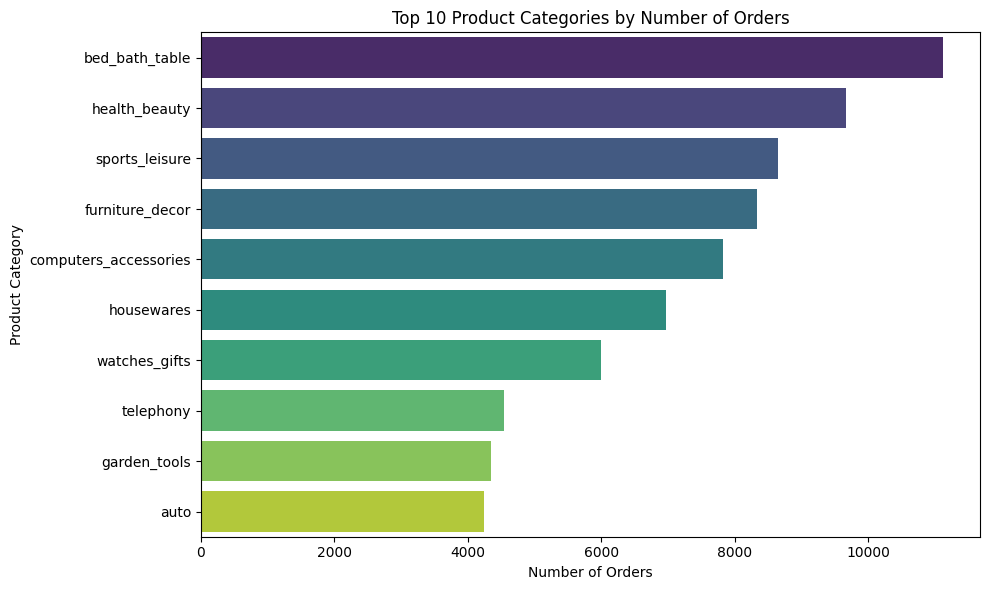

In [132]:
def analyze_products(ascending):
    product_counts = product_sales.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=ascending)
    plt.figure(figsize=(10, 6))
    sns.barplot(y=product_counts.head(10).index, x=product_counts.head(10).values, palette="viridis")
    if not ascending:
        plt.title('Top 10 Product Categories by Number of Orders')
    else:
        plt.title('Top 10 Product Categories by Number of Orders (Reverse)')

    plt.xlabel('Number of Orders')
    plt.ylabel('Product Category')
    plt.tight_layout()
    plt.show()

analyze_products(False)


<ipython-input-132-772be6d6e162>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_counts.head(10).index, x=product_counts.head(10).values, palette="viridis")


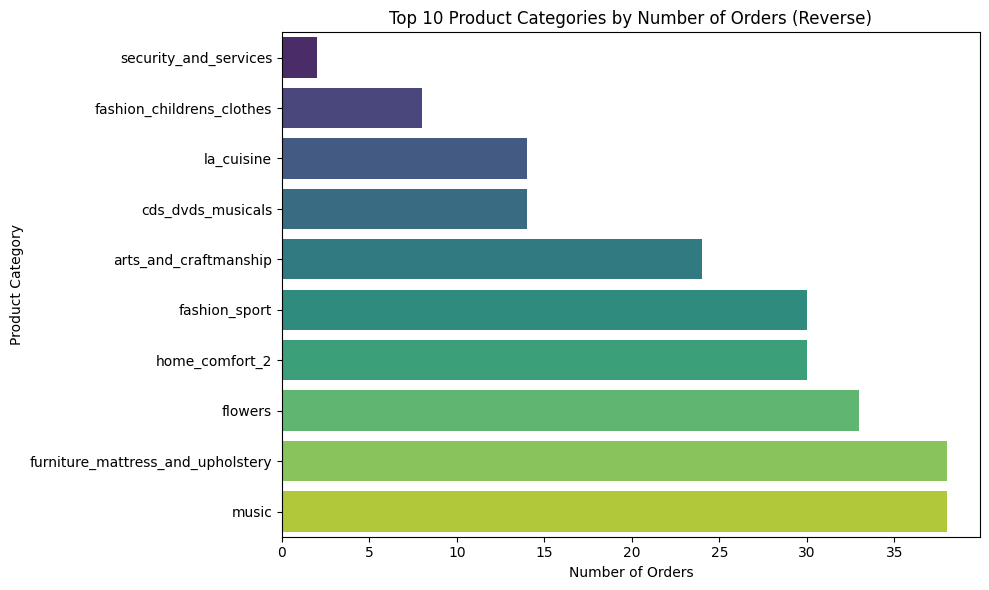

In [133]:
analyze_products(True)

Kategori produk dengan penjualan tertinggi kemungkinan adalah health_beauty, watches_gifts, bed_bath_table, dan computers_accessories

Kategori produk dengan penjualan terendah mungkin termasuk security_and_services, fashion_childrens_clothes, dan musical_instruments, karena pasar yang lebih terbatas.

### Pertanyaan 2: Apa metode pembayaran yang paling sering digunakan oleh pelanggan?

<ipython-input-134-5034e2b4ab9b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=payment_counts['payment_type'].head(), x=payment_counts['count'].head(5), palette="viridis")


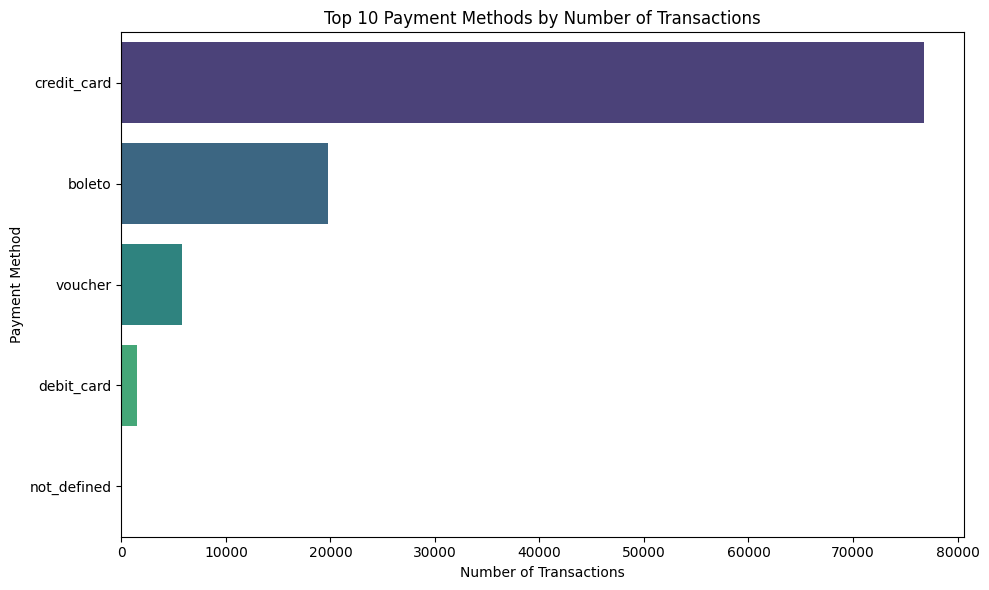

In [134]:
def analyze_payments():
    payment_counts = payment_analysis.groupby('payment_type').size().reset_index(name='count')
    payment_counts = payment_counts.sort_values(by='count', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(y=payment_counts['payment_type'].head(), x=payment_counts['count'].head(5), palette="viridis")
    plt.title('Top 10 Payment Methods by Number of Transactions')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Payment Method')
    plt.tight_layout()
    plt.show()

analyze_payments()


Kartu kredit adalah metode pembayaran yang paling banyak digunakan


### Pertanyaan 3: Bagaimana distribusi pelanggan berdasarkan provinsi, dan apakah ada wilayah dengan aktivitas pembelian lebih tinggi?

<ipython-input-135-594071315adc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=customer_counts['customer_state'], x=customer_counts['customer_id'], palette='magma')


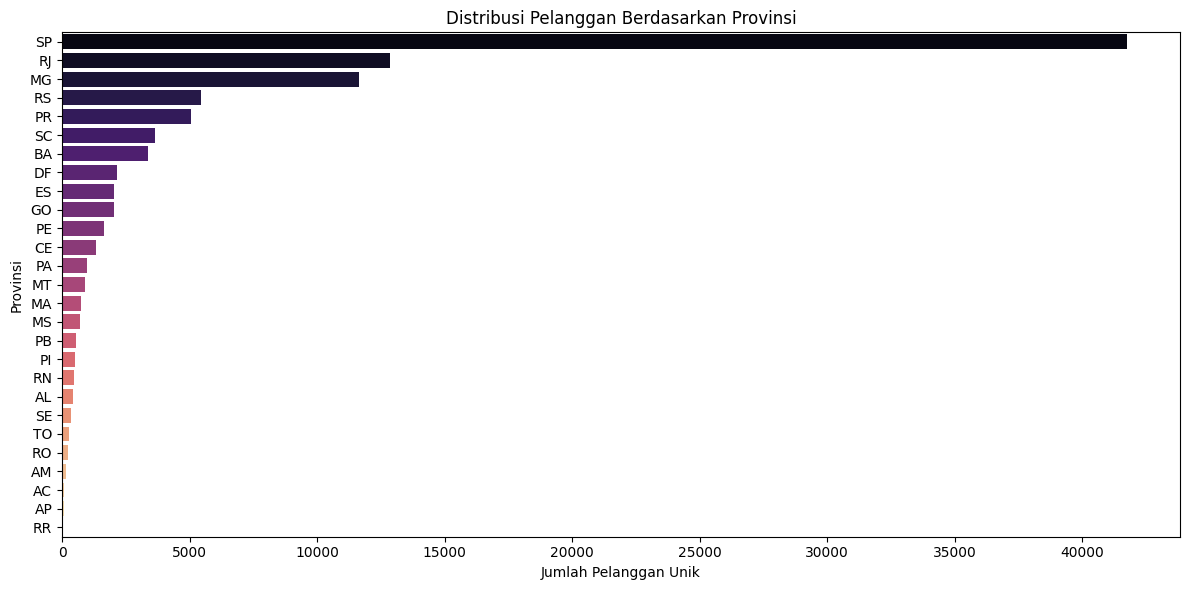

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_customers_by_state():
    customer_counts = customer_distribution.groupby('customer_state')['customer_id'].nunique().reset_index()

    customer_counts = customer_counts.sort_values(by='customer_id', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(y=customer_counts['customer_state'], x=customer_counts['customer_id'], palette='magma')
    plt.title('Distribusi Pelanggan Berdasarkan Provinsi')
    plt.xlabel('Jumlah Pelanggan Unik')
    plt.ylabel('Provinsi')
    plt.tight_layout()
    plt.show()

analyze_customers_by_state()


Provinsi dengan jumlah pelanggan terbanyak adalah São Paulo (SP), diikuti oleh Rio de Janeiro (RJ) dan Minas Gerais (MG).

### Pertanyaan 4: Pada hari apa pelanggan paling sering berbelanja online

<ipython-input-136-e537835c7090>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day['order_day'], y=orders_by_day['order_id'], palette='Blues_r')


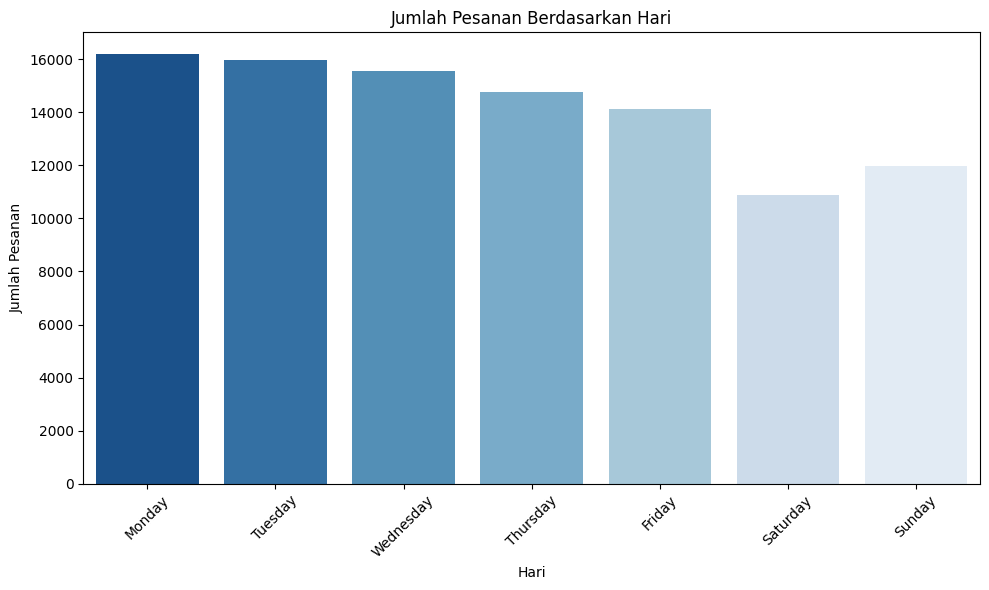

In [136]:
def analyze_orders_by_day():
    orders_by_day = orders.groupby('order_day')['order_id'].count().reset_index()

    order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    orders_by_day['order_day'] = pd.Categorical(orders_by_day['order_day'], categories=order_days, ordered=True)
    orders_by_day = orders_by_day.sort_values('order_day')

    plt.figure(figsize=(10, 6))
    sns.barplot(x=orders_by_day['order_day'], y=orders_by_day['order_id'], palette='Blues_r')
    plt.title('Jumlah Pesanan Berdasarkan Hari')
    plt.xlabel('Hari')
    plt.ylabel('Jumlah Pesanan')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_orders_by_day()


Aktivitas belanja tertinggi terjadi pada hari Selasa dan Rabu, sementara akhir pekan cenderung lebih sepi.

## Conclusion

Kategori Produk Terlaris: Produk dalam kategori kesehatan & kecantikan, peralatan rumah tangga, dan aksesoris komputer memiliki jumlah transaksi tertinggi. Sebaliknya, produk jasa keamanan dan pakaian anak-anak memiliki penjualan yang lebih rendah.

Metode pembayaran paling populer adalah credit card

Provinsi yang paling banyak usernya SP, RJ, MG

Hari paling banyak usernya adalah Mondat, Tuesday, Wednesday